In [4]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import algoritmo.data_import as dataI
import pandas as pd
import numpy as np
import matplotlib as plt


from sklearn.tree import DecisionTreeRegressor

In [5]:
(train,test) = dataI.data_import()
train.head()
train.drop(['id'],inplace=True,axis=1)
test.drop(['id'],inplace=True,axis=1)

In [5]:
uniques_values = {}
for column in train.columns:
    
    uniques_values[column] = train[column].unique().flatten()

In [6]:
for column in test.columns:
    values = test[column].unique().flatten()
    for value in values:
        
        if not  (value in uniques_values[column]):
            print column
            print value

precipitation_inches
0.4


In [9]:
test['id'].unique()

array([504737, 831189, 444493, ..., 378510, 426726, 644534])

In [27]:
train.zip_code.unique()

array(['94602', '94133', '94107', ..., '77990', '91309', '60480'], dtype=object)

In [6]:
sample = train.sample(100)

In [35]:
sample

,duration,start_station_id,bike_id,subscription_type,zip_code,start_date_weekday,start_date_month,start_date_hour
205087,1245,82,504,1,94301,0,3,18
488154,301,70,290,1,94103,2,2,8
287752,1062,74,481,1,94107,2,6,17
438542,961,60,189,1,94105,0,1,7
247742,460,39,636,1,94107,2,3,13
49958,432,76,158,1,94607,3,6,9
312991,848,55,450,1,94611,3,4,8
121854,465,57,109,1,94403,2,1,19
411314,2460,38,13,2,94022,6,10,14
137684,739,50,559,1,94925,1,2,9


In [36]:
print sample.columns.tolist()

['duration', 'start_station_id', 'bike_id', 'subscription_type', 'zip_code', 'start_date_weekday', 'start_date_month', 'start_date_hour']


In [11]:
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(sample[['start_station_id', 'bike_id', 'subscription_type', 'start_date_weekday', 'start_date_month', 'start_date_hour']], sample['duration'])

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file='tree.dot', feature_names=['start_station_id', 'bike_id', 'subscription_type', 'start_date_weekday', 'start_date_month', 'start_date_hour'])

In [13]:
# sudo apt install graphviz

! dot -Tpng tree.dot > tree.png # to convert the tree in a png image

# $ dot -Tpng tree.dot -o tree.png

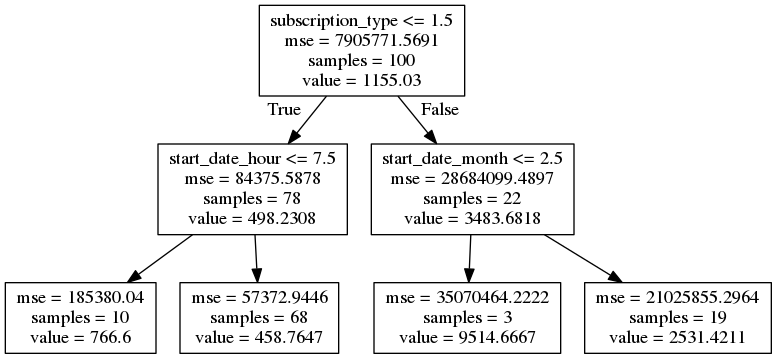

In [10]:
from IPython.display import Image
Image(filename='tree.png')